### PACKETBEAT

In [1]:
import pandas as pd

df = pd.read_csv('data/data_packetbeat.csv', low_memory=False)

In [2]:
df = df.dropna(axis=1, how = 'all')
#df = df.drop(['@version','network.direction', 'dns.type', '_type', 'client.bytes','dns.answers_count', 'dns.authorities_count','dns.flags.authentic_data', 'client.ip', 'client.port','server.bytes', 'server.ip', 'server.port', '_id', '_index', '_type', 'agent.ephemeral_id', 'agent.hostname', 'agent.id', 'agent.version', 'cloud.account.id', 'cloud.availability_zone', 'cloud.image.id', 'cloud.instance.id', 'cloud.machine.type', 'cloud.provider', 'cloud.region', 'ecs.version', 'event.kind', 'host.architecture', 'host.containerized', 'host.os.name', 'host.os.platform', 'dns.additionals_count', 'dns.flags.authoritative', 'dns.flags.checking_disabled', 'dns.flags.recursion_available', 'dns.flags.recursion_desired','dns.flags.truncated_response','dns.header_flags', 'dns.id', 'query', 'resource', 'dns.question.class', 'dns.question.etld_plus_one', 'dns.question.name', 'network.protocol', 'dns.op_code', 'dns.question.registered_domain', 'dns.question.type','dns.response_code', 'status', 'event.action', 'event.category', 'tags', 'type', 'network.type', 'host.hostname', 'host.name', 'host.os.codename', 'host.os.family','host.os.kernel', 'host.os.version', 'method', 'flow.id', 'network.community_id', 'flow.final'], axis=1)
df = df[['@timestamp', 'source.bytes', 'source.packets','destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'network.transport', 'event.duration']]

In [3]:
df = df.sort_values(by='@timestamp')
df = df.reset_index()
del df['index']
df = df[['source.bytes', 'source.packets','destination.bytes', 'destination.packets', 'network.packets', 'network.bytes', 'network.transport', 'event.duration']]

In [4]:
df = df.dropna()

In [5]:
df.dtypes

source.bytes            object
source.packets         float64
destination.bytes       object
destination.packets    float64
network.packets         object
network.bytes           object
network.transport       object
event.duration          object
dtype: object

In [6]:
#df['source.bytes'] = df['source.bytes'].str.replace(',', '').astype(float)
#df['source.bytes']

In [7]:
#for i in range(0, len(df)):
df['event.duration'] = df['event.duration'].str.replace(',', '')
df

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,network.transport,event.duration
0,92,1.0,92,1.0,2,184,udp,52203
1,"11,568",168.0,"147,932",159.0,327,"159,500",tcp,4319744195010
2,"1,736",13.0,"2,289",10.0,23,"4,025",tcp,4096005300
3,"1,848",15.0,"2,289",10.0,25,"4,137",tcp,6143909439
4,"1,792",14.0,"2,289",10.0,24,"4,081",tcp,6143951873
...,...,...,...,...,...,...,...,...
12555,"1,792",14.0,"2,289",10.0,24,"4,081",tcp,4096030614
12556,"1,680",12.0,"2,289",10.0,22,"3,969",tcp,3071949618
12557,112,2.0,56,1.0,3,168,tcp,76843
12558,92,1.0,92,1.0,2,184,udp,34619


In [8]:
var = ['source.bytes', 'destination.bytes', 'network.bytes', 'network.packets']
import pandas as pd
#var = ['source.bytes']

for var in var:
    #for i in range(0, len(df)):
    df[var] = df[var].str.replace(',', '').astype(float)    
df

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,network.transport,event.duration
0,92.0,1.0,92.0,1.0,2.0,184.0,udp,52203
1,11568.0,168.0,147932.0,159.0,327.0,159500.0,tcp,4319744195010
2,1736.0,13.0,2289.0,10.0,23.0,4025.0,tcp,4096005300
3,1848.0,15.0,2289.0,10.0,25.0,4137.0,tcp,6143909439
4,1792.0,14.0,2289.0,10.0,24.0,4081.0,tcp,6143951873
...,...,...,...,...,...,...,...,...
12555,1792.0,14.0,2289.0,10.0,24.0,4081.0,tcp,4096030614
12556,1680.0,12.0,2289.0,10.0,22.0,3969.0,tcp,3071949618
12557,112.0,2.0,56.0,1.0,3.0,168.0,tcp,76843
12558,92.0,1.0,92.0,1.0,2.0,184.0,udp,34619


In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['network.transport'] = le.fit_transform(df['network.transport'].values)
df

,source.bytes,source.packets,destination.bytes,destination.packets,network.packets,network.bytes,network.transport,event.duration
0,92.0,1.0,92.0,1.0,2.0,184.0,2,52203
1,11568.0,168.0,147932.0,159.0,327.0,159500.0,1,4319744195010
2,1736.0,13.0,2289.0,10.0,23.0,4025.0,1,4096005300
3,1848.0,15.0,2289.0,10.0,25.0,4137.0,1,6143909439
4,1792.0,14.0,2289.0,10.0,24.0,4081.0,1,6143951873
...,...,...,...,...,...,...,...,...
12555,1792.0,14.0,2289.0,10.0,24.0,4081.0,1,4096030614
12556,1680.0,12.0,2289.0,10.0,22.0,3969.0,1,3071949618
12557,112.0,2.0,56.0,1.0,3.0,168.0,1,76843
12558,92.0,1.0,92.0,1.0,2.0,184.0,2,34619


In [10]:
X = df

In [11]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 5
Estimated number of noise points: 11274


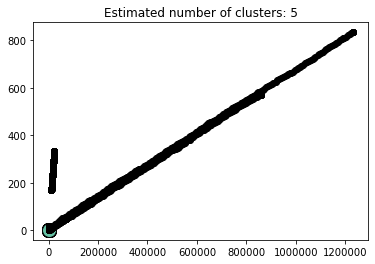

In [12]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



In [13]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(df)
labels



array([   0,   -1,    1, ..., 2104,   -1,   -1])

In [14]:
from sklearn.preprocessing import StandardScaler
def dbscan(X, eps, min_samples):
    #ss = StandardScaler()
    #X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    #db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

In [15]:
import calendar
from datetime import datetime
import datetime
import time

split = df['@timestamp'][1].split()
split[1] = split[1].replace(',', '')
split

abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}
date = str(split[2]) + "-" + str(abbr_to_num[split[0]]) + "-" + str(split[1]) + str(split[4])

time = split[4].split(":")
mil = time[2].split(".")

KeyError: '@timestamp'

In [ ]:
x = datetime.datetime(int(split[2]), int(abbr_to_num[split[0]]), int(split[1]), int(time[0]), int(time[1]), int(mil[0]), int(mil[1]))
#timestamp = time.mktime(dt.timetuple())
#print(timestamp)
#timestamp = datetime.timestamp(x)
#print("timestamp =", timestamp)
timestamp = x.timestamp()
timestamp